In [6]:
#LINK - kaggle.com
# bu siteden veri seti alınıp denemeler yapılabilir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [7]:
dataFrame = pd.read_excel("merc.xlsx")
mapping = {"Manual": 1, "Semi-Auto": 2, "Automatic":3}
dataFrame.loc[:, 'transmission'] = dataFrame['transmission'].map(mapping).fillna(0)
dataFrame = dataFrame[dataFrame["engineSize"]>1]
dataFrame = dataFrame[dataFrame["transmission"]>0]
dataFrame = dataFrame[dataFrame["tax"]>0]
dataFrame = dataFrame.sort_values("price",ascending=False).iloc[131:]
dataFrame
#NOTE - burada verimizde yazı vardı ve onu sayıya çevirdik


,year,price,transmission,mileage,tax,mpg,engineSize
5779,2020,65990,2.0,999,145,28.0,4.0
6177,2019,65990,2.0,5076,150,30.4,3.0
3191,2020,65980,2.0,3999,145,28.0,4.0
4727,2019,65000,2.0,3398,145,27.2,4.0
8814,2019,64999,2.0,119,145,40.9,3.0
...,...,...,...,...,...,...,...
12594,2004,1495,1.0,119000,300,34.5,1.8
11549,2002,1495,3.0,13800,305,39.8,2.7
11765,2000,1490,3.0,87000,265,27.2,3.2
12008,2010,1350,1.0,116126,145,54.3,2.0


In [8]:
dataFrame.describe()
#NOTE - öncelikle veriyi anlamalıyız
# aşağıda listelendi bu bize uygulayacağımız sistem için fikir verecek

,year,price,mileage,tax,mpg,engineSize
count,12803.000000,12803.000000,12803.000000,12803.000000,12803.000000,12803.00000
mean,2017.307194,24195.825432,21785.467859,131.412560,54.784918,2.05512
std,2.193299,9874.990097,20973.904515,63.744823,13.649952,0.53139
min,1997.000000,650.000000,1.000000,10.000000,1.100000,1.30000
25%,2016.000000,17490.000000,6200.000000,125.000000,45.600000,1.80000
50%,2018.000000,22491.000000,15096.000000,145.000000,56.500000,2.00000
75%,2019.000000,28888.500000,31471.000000,145.000000,64.200000,2.10000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.20000


In [9]:
dataFrame.isnull().sum()
#NOTE - bu şekilde hangi kolonda kaç tane boş veri var görünecek

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [10]:
(dataFrame==0).sum()
#NOTE - bu şekilde hangi kolonda kaç tane sıfır olan veri var görünecek
# göründüğü üzere 172 tane vergi sıfır olan araç var
# 12 tane motor büyüklüğü sıfır olan veri var
# verginin sıfır olması bir yana ama motor büyüklüğü sıfır yazması kötü
# ve 12 tane veri 13119 adet verinin yanında bir hiç sayılır. bu yüzden çıkarılabilir
#TODO -  belki vergide çıkarılabilir bu denenecek

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

c:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


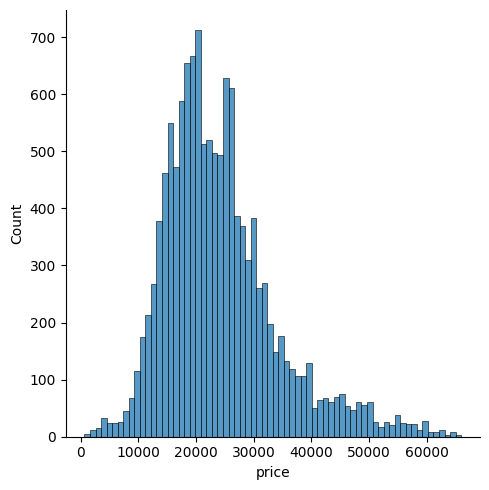

In [11]:
sbn.displot(dataFrame["price"])
#NOTE - grafikte görünene göre en pahalı arabalar bize sıkıntı çıkarabilir
# çünkü pahalı arabaların sayısı az görünüyor bu sıkıntı çıkarabilir

c:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


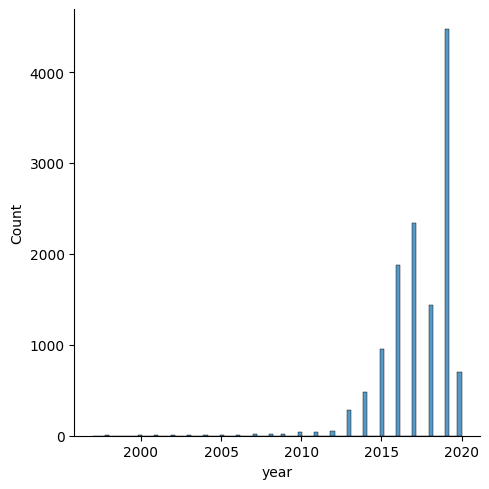

In [12]:
sbn.displot(dataFrame["year"])

In [13]:
dataFrame.corr()["price"].sort_values()
#NOTE - kolonların fiyata göre ilişkileri (korelasyonu) listeleniyor

mileage        -0.594483
mpg            -0.429157
transmission    0.130160
tax             0.283277
engineSize      0.423948
year            0.599010
price           1.000000
Name: price, dtype: float64

<Axes: xlabel='tax', ylabel='price'>

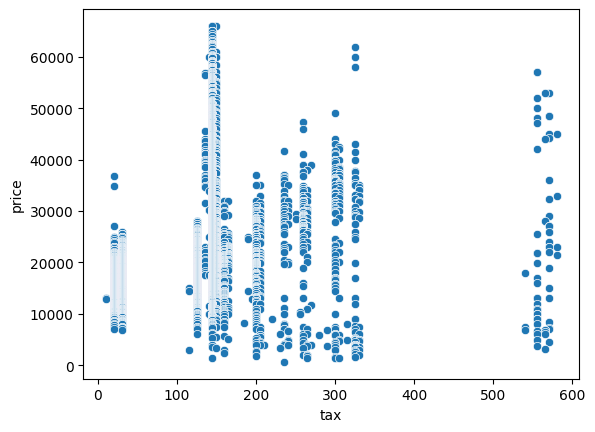

In [14]:
sbn.scatterplot(x="tax", y="price",data=dataFrame)

In [15]:
dataFrame.groupby("tax").mean()["price"]

tax
10     12944.000000
20     15269.412330
30     16641.747720
115    10863.333333
125    17780.304348
135    35040.979167
140    28507.571429
145    27770.041440
150    24264.219309
160    18468.760638
165    20478.061538
185     8290.000000
190    21301.666667
195    12950.000000
200    20706.974638
205    20799.936508
210     3995.000000
220     8949.000000
230     4687.500000
235    24592.423077
240    20019.666667
250    28990.000000
255    10222.500000
260    27707.853659
265    21758.972222
270    18240.000000
280     5980.000000
290     5235.000000
300    27423.424242
305    30463.621622
315     6437.500000
325    18302.854839
330    20084.555556
540    10799.333333
555    21839.107143
565    19306.250000
570    26470.909091
580    30622.500000
Name: price, dtype: float64

In [16]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis=1).values

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
x_train.shape

(8962, 6)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Activation,BatchNormalization,MaxPooling2D,Flatten
from keras.callbacks import EarlyStopping



Epoch 3928: early stopping


<Axes: >

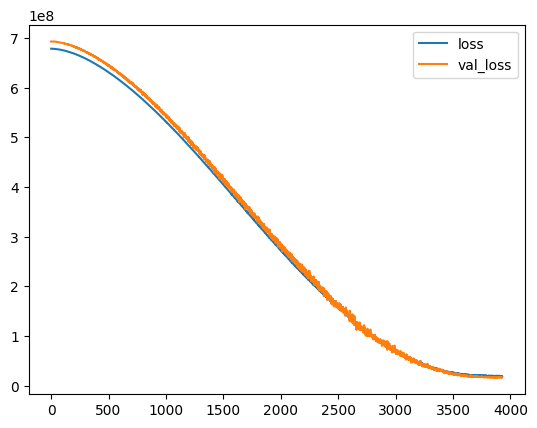

In [20]:
# Model oluşturma
model = Sequential()
model.add(Dense(20, input_shape=(6,), activation="relu")) # Girdi şeklini (6,) olarak değiştirme
model.add(Dropout(0.2)) # Dropout düzenlileştirme katmanı ekleme
model.add(BatchNormalization()) # Batch Normalization katmanı ekleme
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.2)) # Dropout düzenlileştirme katmanı ekleme
model.add(BatchNormalization()) # Batch Normalization katmanı ekleme
model.add(Dense(1))

# Modeli derleme
model.compile(optimizer="adam", loss="mse") # Optimizatörü adam olarak değiştirme

# Erken durdurma geri çağırması tanımlama
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=50)

# Modeli eğitme
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=1000, epochs=5000, verbose=0, callbacks=[early_stop]) # Toplu boyutu 1000 ve dönem sayısını 1000 olarak değiştirme

# Kayıp değerlerini çizme
lossValues = pd.DataFrame(model.history.history)
lossValues.plot()

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
tahminDizisi = model.predict(x_test)
mean_absolute_error(y_test,tahminDizisi)

121/121 [==============================] - 0s 1ms/step


2961.3843247831505

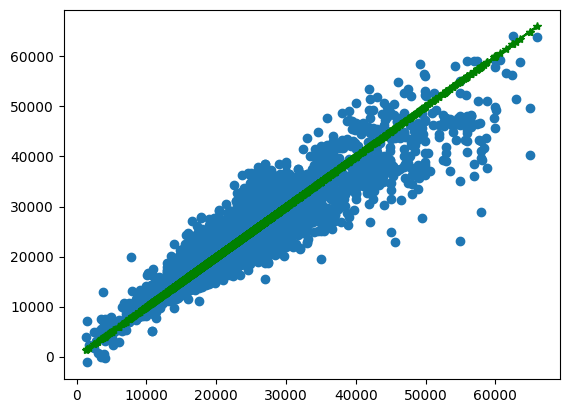

In [22]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [23]:
index = 5000
yeniArabaSeries = dataFrame.drop("price",axis=1).iloc[index]
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,6))
print(dataFrame.iloc[index])
model.predict(yeniArabaSeries)

year             2017
price           24998
transmission      2.0
mileage         53351
tax               145
mpg              56.5
engineSize        2.1
Name: 941, dtype: object
1/1 [==============================] - 0s 28ms/step


array([[20165.121]], dtype=float32)